PREDICTING APPARTMENT PRICES IN BELGIUM

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import cleaned dataset

In [21]:
FILE='data_last.csv'
df=pd.read_csv(FILE,low_memory=False)

Check for nan values

In [22]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Data Types

In [23]:
df.dtypes

id                                    int64
transaction.sale.price                int64
transaction.sale.isSubjectToVat        bool
subtype                              object
age                                   int64
bedroomCount                          int64
bathroomCount                         int64
netHabitableSurface                   int64
toiletCount                           int64
transaction.certificates.epcScore    object
building.condition                   object
kitchen.type                         object
flags.isNewlyBuilt                    int64
hasBasement                           int64
hasDressingRoom                       int64
hasDisabledAccess                     int64
hasLift                               int64
hasArmoredDoor                        int64
hasVisiophone                         int64
hasSecureAccessAlarm                  int64
fireplaceExists                       int64
hasTerrace                            int64
transaction.sale.isFurnished    

Checkfor unique values of object data types to use in ordinal encoder

In [24]:
df['transaction.certificates.epcScore'].unique()
df['subtype'].unique()

array(['APARTMENT', 'DUPLEX', 'LOFT', 'PENTHOUSE', 'TRIPLEX'],
      dtype=object)

Create encoder, drop unnecessary columns

In [25]:
epc_ordinal=['G', 'F', 'E','D', 'C', 'B', 'A', 'A+', 'A++']
building_condition_ordinal=['TO_BE_DONE_UP', 'JUST_RENOVATED', 'GOOD','AS_NEW']
kitchen_type_ordinal=['INSTALLED','USA_INSTALLED', 'SEMI_EQUIPPED', 'USA_SEMI_EQUIPPED', 'HYPER_EQUIPPED',  'USA_HYPER_EQUIPPED']
subtype_ordinal=['APARTMENT','DUPLEX','PENTHOUSE','TRIPLEX','LOFT']


drop_cols=['transaction.sale.isSubjectToVat','id']
num_cols=[	'bedroomCount',	'bathroomCount',	'netHabitableSurface',	'toiletCount']
cat_cols=['subtype','transaction.certificates.epcScore',	'building.condition',	'kitchen.type']
ord_col=['transaction.certificates.epcScore',	'building.condition',	'kitchen.type','subtype']
dl=df.copy()
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[epc_ordinal,building_condition_ordinal,kitchen_type_ordinal,subtype_ordinal])

df[["transaction.certificates.epcScore", "building.condition",'kitchen.type',"subtype"]] = enc.fit_transform(df[["transaction.certificates.epcScore", "building.condition",
                                                                                                                    'kitchen.type',"subtype"]])

df = df.drop(drop_cols,axis=1)

y=df['transaction.sale.price'].values
X=df.drop(['transaction.sale.price'],axis=1)

In [26]:
df.head(5)

,transaction.sale.price,subtype,age,bedroomCount,bathroomCount,netHabitableSurface,toiletCount,transaction.certificates.epcScore,building.condition,kitchen.type,...,hasDisabledAccess,hasLift,hasArmoredDoor,hasVisiophone,hasSecureAccessAlarm,fireplaceExists,hasTerrace,transaction.sale.isFurnished,specificities.hasOffice,hasparking
0,500000,0.0,2,2,2,163,1,5.0,3.0,0.0,...,0,1,0,0,0,0,1,0,1,1
1,499000,0.0,18,2,1,146,1,5.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,499000,0.0,11,4,2,153,2,2.0,3.0,4.0,...,1,1,1,1,0,0,1,0,1,0
3,499000,0.0,1,3,2,115,1,5.0,3.0,5.0,...,1,1,1,1,0,0,0,0,0,1
4,499000,0.0,1,3,2,115,2,6.0,3.0,5.0,...,1,1,0,1,0,0,1,0,0,1


Check for correlations

,transaction.sale.price,subtype,age,bedroomCount,bathroomCount,netHabitableSurface,toiletCount,transaction.certificates.epcScore,building.condition,kitchen.type,flags.isNewlyBuilt,hasBasement,hasDressingRoom,hasDisabledAccess,hasLift,hasArmoredDoor,hasVisiophone,hasSecureAccessAlarm,fireplaceExists,hasTerrace,transaction.sale.isFurnished,specificities.hasOffice,hasparking
transaction.sale.price,1.000000,0.185682,-0.083726,0.247807,0.398639,0.387803,0.365954,0.028293,0.137311,0.218834,0.041480,0.129654,0.122101,0.129115,0.237808,0.212693,0.216841,0.176154,0.119856,0.233822,0.106261,0.056329,0.044101
subtype,0.185682,1.000000,0.000645,0.194480,0.127412,0.365064,0.264452,-0.055151,-0.006146,0.009168,-0.037616,0.042384,0.086895,-0.037934,-0.094046,-0.007546,0.023956,0.100565,0.129086,0.009199,-0.031610,0.199862,0.021959
age,-0.083726,0.000645,1.000000,0.082457,-0.054870,0.119693,0.035367,-0.441827,-0.393446,-0.332300,-0.584836,-0.003165,0.027672,-0.231207,-0.126255,-0.065675,-0.197028,-0.023724,0.023239,-0.055107,0.053631,-0.005555,-0.043973
bedroomCount,0.247807,0.194480,0.082457,1.000000,0.345447,0.569480,0.335845,-0.025174,-0.001380,-0.046941,-0.050321,0.067204,0.013087,-0.075862,-0.086760,0.058382,-0.020376,0.041193,-0.000911,0.027595,-0.009702,0.118454,0.061948
bathroomCount,0.398639,0.127412,-0.054870,0.345447,1.000000,0.321647,0.343155,-0.025333,0.062959,0.085824,0.031903,0.028536,-0.032555,0.150826,0.113146,0.115696,0.094079,-0.010755,0.059068,0.062338,0.054339,0.056830,-0.002461
netHabitableSurface,0.387803,0.365064,0.119693,0.569480,0.321647,1.000000,0.393575,-0.049405,0.041187,-0.006998,-0.030227,0.008618,0.087474,-0.069013,-0.095158,0.018865,-0.014063,0.105085,0.132823,0.061091,0.023727,0.264137,0.102083
toiletCount,0.365954,0.264452,0.035367,0.335845,0.343155,0.393575,1.000000,-0.069389,0.036889,0.026455,0.000047,0.133007,0.069576,0.079495,-0.015728,0.084481,0.073574,0.128377,0.013199,0.030979,0.000658,0.112823,0.059300
transaction.certificates.epcScore,0.028293,-0.055151,-0.441827,-0.025174,-0.025333,-0.049405,-0.069389,1.000000,0.289020,0.081353,0.312994,-0.052546,-0.010625,-0.010825,0.060328,-0.140077,0.076982,-0.031373,-0.069631,0.094913,-0.060200,-0.026455,0.036621
building.condition,0.137311,-0.006146,-0.393446,-0.001380,0.062959,0.041187,0.036889,0.289020,1.000000,0.327431,0.303495,0.026394,0.110752,0.241034,0.105845,0.150069,0.293635,0.086371,0.013758,0.050562,0.043395,0.079185,0.045126
kitchen.type,0.218834,0.009168,-0.332300,-0.046941,0.085824,-0.006998,0.026455,0.081353,0.327431,1.000000,0.217839,0.114431,0.039932,0.222486,0.147366,0.224274,0.311441,0.011620,0.023238,0.131056,-0.029096,0.043907,0.040382


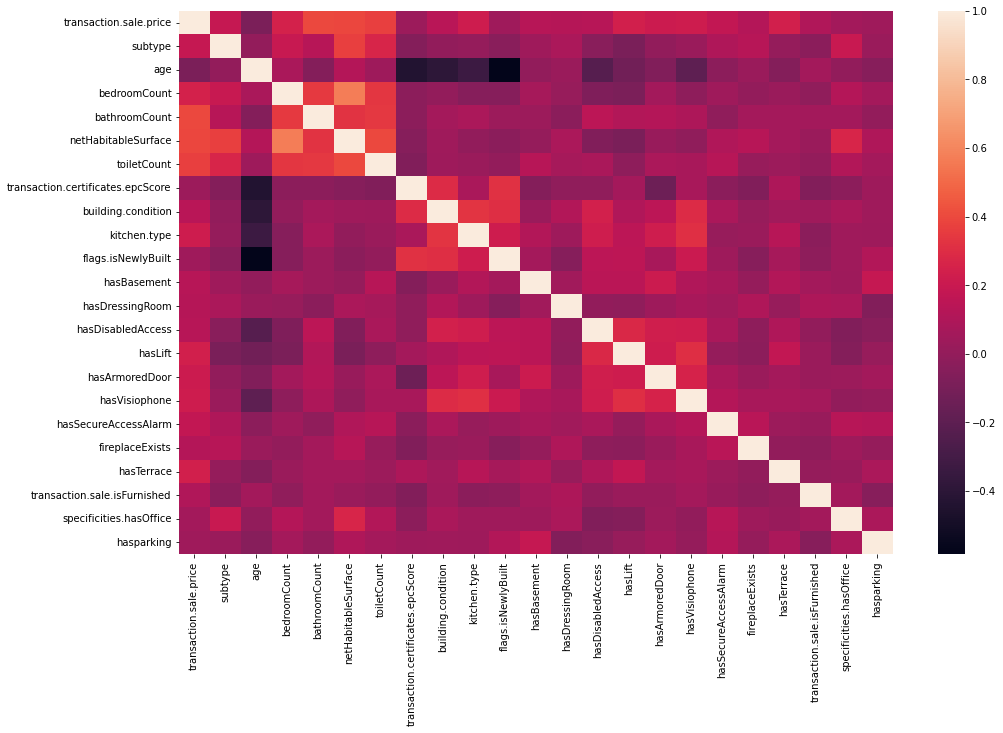

In [30]:
plt.subplots(figsize=(16,10))
sns.heatmap(df.corr())
df.corr().style.background_gradient(cmap="Blues")



In [ ]:
plt.subplots(figsize=(16,10))
df.drop("transaction.sale.price",1).corrwith(df['transaction.sale.price']).plot(kind='bar')

Create the model 
Best model is choosen with pycaret

In [27]:
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



regr=CatBoostRegressor(nan_mode= 'Min', eval_metric= 'RMSE', iterations=1000, sampling_frequency= 'PerTree', leaf_estimation_method= 'Newton', grow_policy= 'SymmetricTree', 
                penalties_coefficient=1, boosting_type= 'Plain', model_shrink_mode= 'Constant', feature_border_type= 'GreedyLogSum', l2_leaf_reg=3, random_strength=1, rsm=1, 
                boost_from_average= True, model_size_reg=0.5, subsample=0.800000011920928, use_best_model= False, random_seed=10, depth=6, posterior_sampling= False, border_count=254, 
                 sparse_features_conflict_fraction=0, leaf_estimation_backtracking= 'AnyImprovement', best_model_min_trees=1, model_shrink_rate=0, min_data_in_leaf=1, 
                 loss_function= 'RMSE', learning_rate=0.0396099984645843, score_function= 'Cosine', task_type= 'CPU', leaf_estimation_iterations=1, bootstrap_type= 'MVS',
                  max_leaves=64
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regr.fit(X_train, y_train)
print("model score: %.3f" % regr.score(X_test, y_test))


0:	learn: 80059.0126646	total: 1.68ms	remaining: 1.67s
1:	learn: 79141.1991295	total: 4.12ms	remaining: 2.06s
2:	learn: 78358.8162077	total: 5.79ms	remaining: 1.92s
3:	learn: 77558.4522406	total: 7.62ms	remaining: 1.9s
4:	learn: 76768.3339863	total: 9.18ms	remaining: 1.83s
5:	learn: 75952.9248694	total: 11.4ms	remaining: 1.89s
6:	learn: 75152.3631064	total: 13.1ms	remaining: 1.86s
7:	learn: 74404.6063494	total: 14.7ms	remaining: 1.82s
8:	learn: 73699.4005768	total: 16.3ms	remaining: 1.79s
9:	learn: 73041.9752739	total: 18ms	remaining: 1.78s
10:	learn: 72483.8582355	total: 19.5ms	remaining: 1.75s
11:	learn: 71919.5726457	total: 21.1ms	remaining: 1.74s
12:	learn: 71405.3033681	total: 22.8ms	remaining: 1.73s
13:	learn: 70825.0373294	total: 24.5ms	remaining: 1.72s
14:	learn: 70294.0080809	total: 26ms	remaining: 1.71s
15:	learn: 69789.0707269	total: 27.8ms	remaining: 1.71s
16:	learn: 69398.7147541	total: 29.5ms	remaining: 1.71s
17:	learn: 68858.7252044	total: 31.2ms	remaining: 1.7s
18:	lear

In [34]:
print(X.columns)
a=list(zip(X.columns,regr.feature_importances_))
a

Index(['subtype', 'age', 'bedroomCount', 'bathroomCount',
       'netHabitableSurface', 'toiletCount',
       'transaction.certificates.epcScore', 'building.condition',
       'kitchen.type', 'flags.isNewlyBuilt', 'hasBasement', 'hasDressingRoom',
       'hasDisabledAccess', 'hasLift', 'hasArmoredDoor', 'hasVisiophone',
       'hasSecureAccessAlarm', 'fireplaceExists', 'hasTerrace',
       'transaction.sale.isFurnished', 'specificities.hasOffice',
       'hasparking'],
      dtype='object')


[('subtype', 2.2528364515492245),
 ('age', 14.510348689655599),
 ('bedroomCount', 1.9129332275115556),
 ('bathroomCount', 6.906910044517297),
 ('netHabitableSurface', 21.700527984344216),
 ('toiletCount', 7.986419085279096),
 ('transaction.certificates.epcScore', 5.56932995914574),
 ('building.condition', 4.808716643261485),
 ('kitchen.type', 5.211894300392258),
 ('flags.isNewlyBuilt', 2.2325405088922308),
 ('hasBasement', 2.2535429602061563),
 ('hasDressingRoom', 0.6168726269348406),
 ('hasDisabledAccess', 3.487034626681524),
 ('hasLift', 5.951420879201106),
 ('hasArmoredDoor', 1.8255043961980464),
 ('hasVisiophone', 2.0294413392143196),
 ('hasSecureAccessAlarm', 1.2240769831810825),
 ('fireplaceExists', 0.18928695699709297),
 ('hasTerrace', 3.76754233808941),
 ('transaction.sale.isFurnished', 1.202803884353514),
 ('specificities.hasOffice', 1.3289719740837815),
 ('hasparking', 3.0310441403104402)]

In [ ]:
import joblib
joblib.dump(regr, "clf2.pkl")

In [ ]:
dk=regr.predict(X)
dl['predicted']=dk
dl.to_csv('compare.csv')

In [28]:
print(regr.score(X, y))

0.7734657256925428


In [29]:
print(regr.score(X_test, y_test))

0.46285424179579915


Kfold feature selection and other models tests

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold,GridSearchCV


#regr = LinearRegression()
#regr=KNeighborsRegressor()
regr=GradientBoostingRegressor(n_estimators=400,max_depth=2,min_samples_split=2,learning_rate=0.1) 

seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

hp_candidates = [{'n_estimators': [200,300,400,500,1000], 'max_depth': [2,3,4,5,16]}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=regr, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)


In [ ]:

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)



In [ ]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import BayesianRidge
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian.score(X_test, y_test)
bayesian.coef_


In [ ]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)
ols.score(X_test, y_test)


In [ ]:
# 3. Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=5000, alpha = 0.01)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

